<a href="https://colab.research.google.com/github/thejustinfields/project2_/blob/main/AdultIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename="/content/drive/MyDrive/adult.csv"
df = pd.read_csv(filename)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- There are no missing values
- There are 48842 rows and 15 columns

##Drop Irrelevant Columns

In [4]:
df = df.drop(columns=["fnlwgt", "educational-num", "relationship"])
df.head()

,age,workclass,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,Never-married,?,White,Female,0,0,30,United-States,<=50K


- "fnlwgt" and "educational-num" are not relevant to outcomes
- "Relationship" gives the same information as "marital-status"

In [5]:
pd.set_option("display.max_columns", None)
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


##Drop Duplicates

In [6]:
df.duplicated().sum()

7916

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

##Check Data Inconsitencies

In [10]:
dtypes=df.dtypes
str_cols = dtypes[dtypes=="object"].index
str_cols

Index(['workclass', 'education', 'marital-status', 'occupation', 'race',
       'gender', 'native-country', 'income'],
      dtype='object')

In [11]:
#check column information for inconsistencies
for col in str_cols:
  print(f"-Column= {col}")
  print(df[col].value_counts(dropna=False))
  print("/n/n")

-Column= workclass
Private             26927
Self-emp-not-inc     3721
Local-gov            2982
?                    2324
State-gov            1910
Self-emp-inc         1644
Federal-gov          1387
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
/n/n
-Column= education
HS-grad         12170
Some-college     8741
Bachelors        6766
Masters          2482
Assoc-voc        1930
11th             1560
Assoc-acdm       1547
10th             1256
7th-8th           928
Prof-school       811
9th               734
12th              606
Doctorate         576
5th-6th           496
1st-4th           242
Preschool          81
Name: education, dtype: int64
/n/n
-Column= marital-status
Married-civ-spouse       19178
Never-married            12189
Divorced                  5919
Widowed                   1489
Separated                 1488
Married-spouse-absent      626
Married-AF-spouse           37
Name: marital-status, dtype: int64
/n/n
-Column= occupation
Prof-

In [12]:
#Check value counts
pd.set_option("display.max_rows", None)
df["capital-gain"].value_counts()

0        36930
15024      501
7688       400
7298       358
99999      241
3103       152
5178       144
5013       116
4386       107
8614        82
3325        80
2174        74
10520       64
4650        63
27828       58
4064        54
594         52
3137        50
20051       49
14084       49
3908        42
6849        42
13550       42
2829        42
1055        37
4787        35
14344       34
3411        34
3464        33
2176        31
9386        31
2597        31
2885        30
4101        29
2202        28
4865        25
4416        24
2407        24
1506        24
4508        23
3674        22
2354        21
10605       19
2580        19
5455        18
3942        18
2907        18
6418        16
3781        16
7430        15
2463        15
6497        15
2105        15
2964        14
25236       14
2635        14
1151        13
2653        11
2977        11
3471        11
3818        11
914         10
15020       10
2414        10
1409        10
6514        10
2290      

In [13]:
df["capital-gain"].value_counts()

0        36930
15024      501
7688       400
7298       358
99999      241
3103       152
5178       144
5013       116
4386       107
8614        82
3325        80
2174        74
10520       64
4650        63
27828       58
4064        54
594         52
3137        50
20051       49
14084       49
3908        42
6849        42
13550       42
2829        42
1055        37
4787        35
14344       34
3411        34
3464        33
2176        31
9386        31
2597        31
2885        30
4101        29
2202        28
4865        25
4416        24
2407        24
1506        24
4508        23
3674        22
2354        21
10605       19
2580        19
5455        18
3942        18
2907        18
6418        16
3781        16
7430        15
2463        15
6497        15
2105        15
2964        14
25236       14
2635        14
1151        13
2653        11
2977        11
3471        11
3818        11
914         10
15020       10
2414        10
1409        10
6514        10
2290      

##Univariate Visuals

In [14]:
# Checking how many categories in each column
cat_cols = df.select_dtypes('object').columns
df[cat_cols].nunique()

workclass          9
education         16
marital-status     7
occupation        15
race               5
gender             2
native-country    42
income             2
dtype: int64

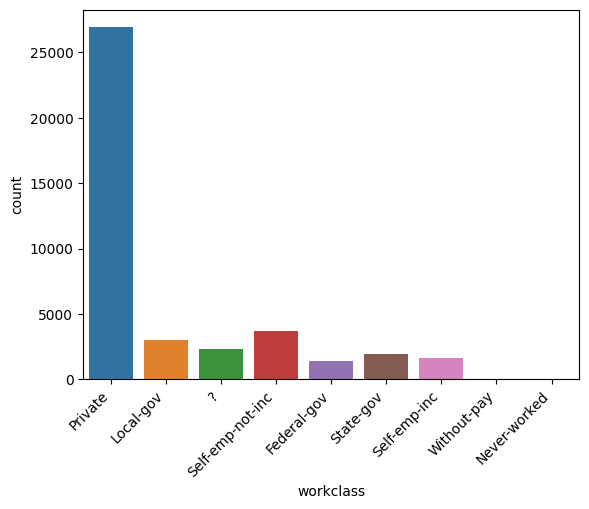

In [15]:
ax = sns.countplot(data=df, x="workclass")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

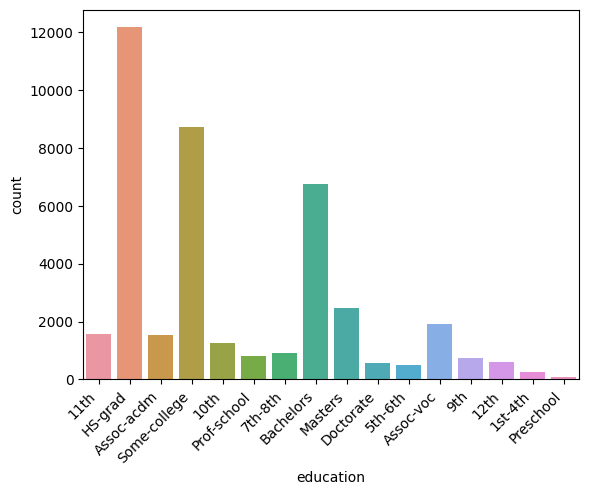

In [16]:
ax = sns.countplot(data=df, x="education")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

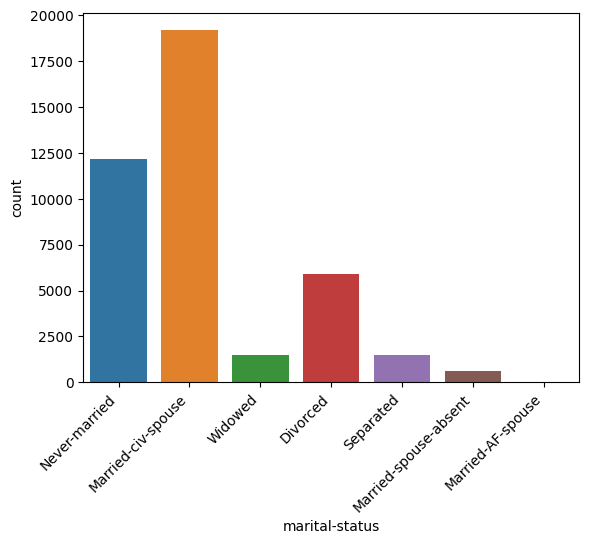

In [17]:
ax = sns.countplot(data=df, x="marital-status")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

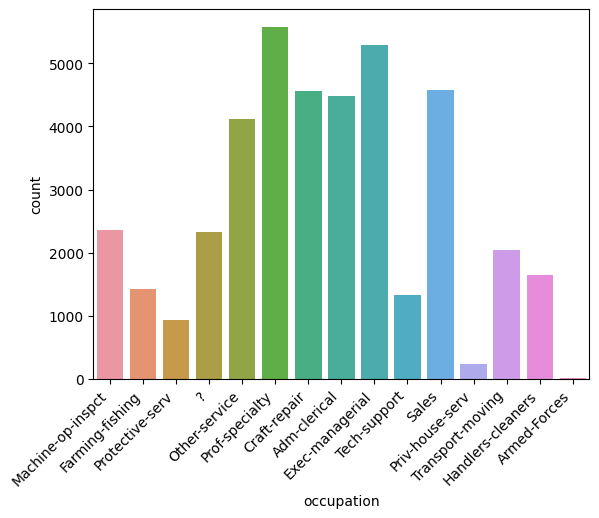

In [18]:
ax = sns.countplot(data=df, x="occupation")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

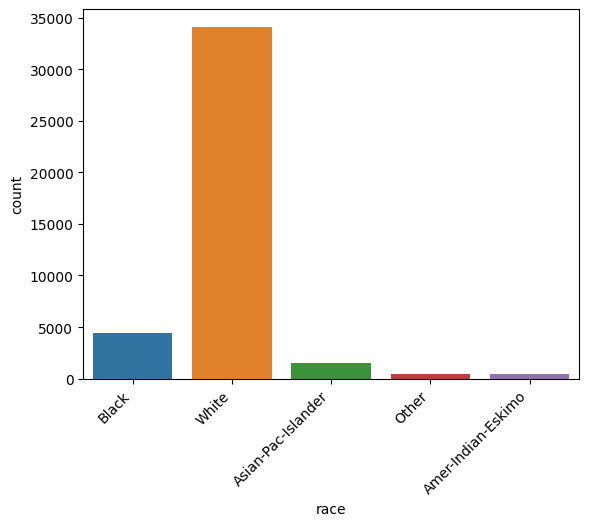

In [20]:
ax = sns.countplot(data=df, x="race")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

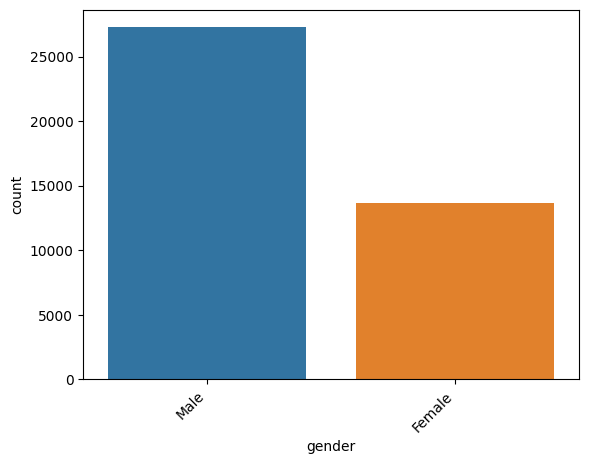

In [21]:
ax = sns.countplot(data=df, x="gender")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

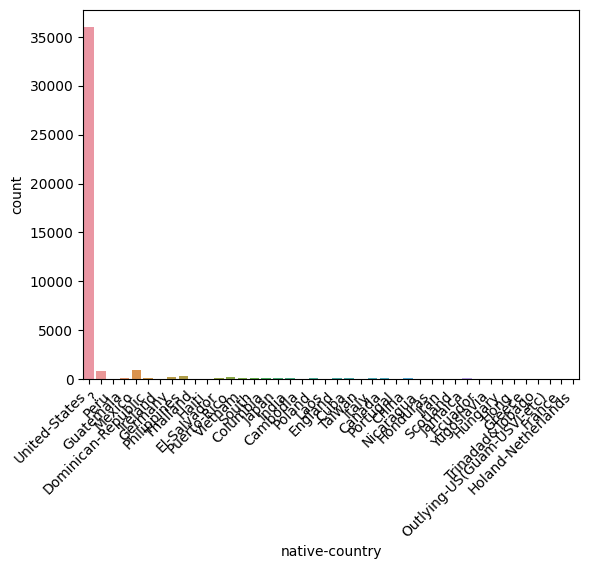

In [23]:
ax = sns.countplot(data=df, x="native-country")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

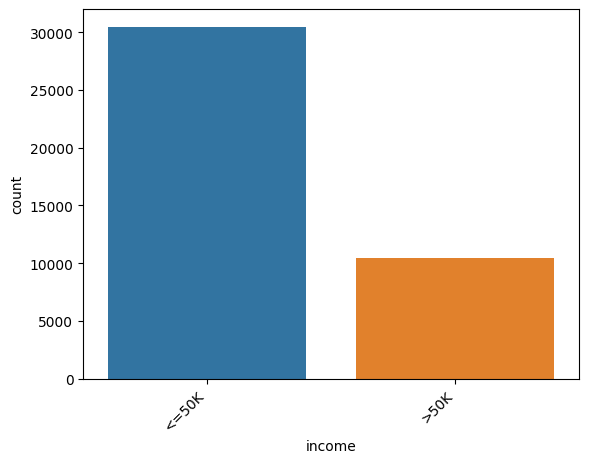

In [24]:
ax = sns.countplot(data=df, x="income")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');